# Profit Prediction for Restaurant Franchise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Suppose there is the CEO of a restaurant franchise and CEO is considering different cities for opening a new outlet.

He/She would like to expand his/her business to cities that may give him/her restaurant higher profits.
The chain already has restaurants in various cities and he/she has data for profits and populations from the cities.
He/she also have data on cities that are candidates for a new restaurant.
For these cities, e/she has the city population.

In [2]:

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("res_profit_data.csv")

# Extract the 'population' and 'profit' columns and store them in separate variables
population_variable = df['population']
profit_variable = df['profit']

# Printing to verify the data
print("Population:", population_variable)
print("Profit:", profit_variable)


Population: 0      5.5277
1      8.5186
2      7.0032
3      5.8598
4      8.3829
       ...   
92     5.3054
93     8.2934
94    13.3940
95     5.4369
96     6.1101
Name: population, Length: 97, dtype: float64
Profit: 0      9.13020
1     13.66200
2     11.85400
3      6.82330
4     11.88600
        ...   
92     1.98690
93     0.14454
94     9.05510
95     0.61705
96    17.59200
Name: profit, Length: 97, dtype: float64


In [3]:
print ('The shape of population_variable is:', population_variable.shape)
print ('The shape of profit_variable is: ', profit_variable.shape)
print ('Number of training examples (m):', len(population_variable))

The shape of population_variable is: (97,)
The shape of profit_variable is:  (97,)
Number of training examples (m): 97


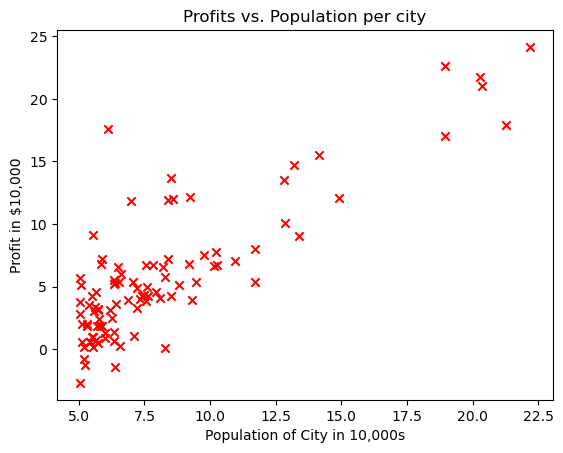

In [4]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(population_variable, profit_variable, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

# Applying linear Regression to make predictions

Cost Function

In [5]:
def cost_funct(x,y,w,b):
    m=len(population_variable)
    total_cost=0
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    total_cost=(cost)/2*m
    return total_cost
        

Gradient Descent

In [6]:
def compute_gradient(x,y,w,b):
    m=len(population_variable)
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw+=(f_wb-y[i])*x[i]
        dj_db+=f_wb-y[i]
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [7]:
def gradient_descent(x,y,w_in,b_in,cost_func,gradient_fun,alpha,num_iter):
    m=len(population_variable)
    wpara=w_in
    bpara=b_in
    for i in range(num_iter):
        dj_dw,dj_db=gradient_fun(x,y,wpara,bpara)
        
        wpara=wpara-alpha*dj_dw
        bpara=bpara-alpha*dj_db
    
    return wpara,bpara

In [8]:
initial_w=0
initial_b=0
alpha=0.01
iterations=2000
w,b=gradient_descent(population_variable,profit_variable,initial_w,initial_b,cost_funct,compute_gradient,alpha,iterations)
print("w= ",w)
print("b= ",b)

w=  1.1822127747573767
b=  -3.7880685727231094


In [9]:
m = population_variable.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * population_variable[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

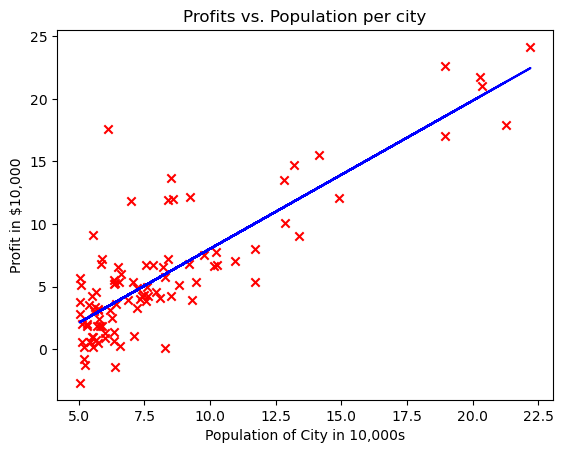

In [10]:
# Plot the linear fit
plt.plot(population_variable, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(population_variable, profit_variable, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Model Trained :) Now muse it for making predictions

In [11]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $3496.76
For population = 70,000, we predict a profit of $44874.21
